In [23]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import gspread as gs
import warnings
import sys
warnings.filterwarnings('ignore')

In [24]:
gc = gs.service_account(filename="C:/Users/leste/OneDrive/Desktop/Python files/mypythonprogrammes/Mydatafiles/service_account.json")

In [25]:
google_spreadsheet = gc.open_by_url("https://docs.google.com/spreadsheets/d/1cM1pMxHZof65AeVIUJphyYZze3Ew0myrzqlmg9tvQdg/edit#gid=1044390699")

In [26]:

class Stock_analysis():
    individual_stock_data = pd.DataFrame()
    Stock_Data = pd.DataFrame()
    stock_dict = {}
   
    def __init__(self,tickers : list,start_date):
            self.tickers = tickers
            self.start_date = start_date
           
    
    def individual_data(self):
         yf.pdr_override()
         for ticks in self.tickers:
                individual_stock_data = pdr.DataReader(ticks.title, self.start_date)
                Stock_analysis.stock_dict.update({f"{ticks.title}_stock" : individual_stock_data})
                

    def download_stocks(self, column_name : str):
            self.column_name = column_name
            yf.pdr_override()
            for ticks in self.tickers:
                Stock_analysis.Stock_Data[ticks.title] = pdr.DataReader(ticks.title, self.start_date)[column_name]
            return Stock_analysis.Stock_Data


    def calculate_returns(self,return_type):
           if return_type == "Log":
                returns_data = np.log(Stock_analysis.Stock_Data/Stock_analysis.Stock_Data.shift(1))
           else: 
                returns_data = (Stock_analysis.Stock_Data/Stock_analysis.Stock_data.shift(1))-1
           return returns_data

    def normalization(self):
            normalized_data = (Stock_analysis.Stock_Data/Stock_analysis.Stock_Data.iloc[0]*100)
            normalized_figure = normalized_data.plot(figsize = (15,6))
            plt.title("Growth Comparison of Stocks")
            return normalized_figure
    
    def individual_return(self):
            individual_return = self.return_calculator(self.return_type).mean()*250
            print(f"The {self.return_type} return of {ticks for ticks in self.tickers} is {round(individual_return,2)} %")
        

    def portfolio_return(self,weights = list):
            import sys
            weights = np.array(weights)
            if sum(weights)!= 1:
                raise ValueError(f"Sum of the weight of the porfolio should be 1,The sum of your weights are {sum(weights)}")
                if len(weights) != Stock_analysis.Stock_Data.shape[1]:
                    sys.exit("The weights of individual security does not match the no. of securities")
            annual_returns = np.dot(self.return_calculator(self.return_type).mean()*250, weights)
            print(f"The annual returns of the portfolio is {round(annual_returns, 2)}% ")

<font face = "Times New Roman" size = 5> Creating DataFrames </font>

In [27]:

def extract_sheets():
    token_ids = []
    sheets = google_spreadsheet.worksheets()
    token_ids = [sheet for sheet in sheets]
    return token_ids
    
extract_sheets()
    

[<Worksheet 'AAPL' id:0>,
 <Worksheet 'MSFT' id:177394609>,
 <Worksheet 'GOOG' id:1261668908>,
 <Worksheet 'AMZN' id:1631741944>,
 <Worksheet 'TSLA' id:1799150376>,
 <Worksheet 'NVDA' id:669265052>,
 <Worksheet 'META' id:1044390699>,
 <Worksheet 'INTC' id:1466750836>,
 <Worksheet 'CSCO' id:443690156>,
 <Worksheet 'AMD' id:850053490>]

In [28]:
securities = Stock_analysis(tickers= extract_sheets(), start_date= "2015-1-1")

In [29]:
securities.download_stocks(column_name="Adj Close")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,MSFT,GOOG,AMZN,TSLA,NVDA,META,INTC,CSCO,AMD
Date,,,,,,,,,,
2015-01-02,24.603205,40.811424,26.168653,15.426000,14.620667,4.834949,78.449997,28.929899,21.460140,2.670000
2015-01-05,23.910093,40.436123,25.623152,15.109500,14.006000,4.753286,77.190002,28.603689,21.032646,2.660000
2015-01-06,23.912348,39.842636,25.029282,14.764500,14.085333,4.609174,76.150002,28.070597,21.024876,2.630000
2015-01-07,24.247644,40.348873,24.986401,14.921000,14.063333,4.597165,76.150002,28.659374,21.219191,2.580000
2015-01-08,25.179296,41.535839,25.065184,15.023000,14.041333,4.770099,78.180000,29.192459,21.382414,2.610000
...,...,...,...,...,...,...,...,...,...,...
2023-01-09,130.149994,227.119995,88.800003,87.360001,119.769997,156.279999,129.470001,29.309999,48.580002,67.239998
2023-01-10,130.729996,228.850006,89.239998,89.870003,118.849998,159.089996,132.990005,29.440001,48.810001,68.050003
2023-01-11,133.490005,235.770004,92.260002,95.089996,123.220001,160.009995,132.889999,29.850000,49.209999,69.059998


In [30]:
securities.calculate_returns("Log")

,AAPL,MSFT,GOOG,AMZN,TSLA,NVDA,META,INTC,CSCO,AMD
Date,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028576,-0.009239,-0.021066,-0.020731,-0.042950,-0.017034,-0.016191,-0.011340,-0.020121,-0.003752
2015-01-06,0.000094,-0.014786,-0.023450,-0.023098,0.005648,-0.030788,-0.013565,-0.018813,-0.000370,-0.011342
2015-01-07,0.013925,0.012626,-0.001715,0.010544,-0.001563,-0.002609,0.000000,0.020758,0.009200,-0.019195
2015-01-08,0.037703,0.028993,0.003148,0.006813,-0.001566,0.036927,0.026309,0.018430,0.007663,0.011561
...,...,...,...,...,...,...,...,...,...,...
2023-01-09,0.004081,0.009689,0.007233,0.014760,0.057655,0.050458,-0.004239,0.019987,0.005366,0.050010
2023-01-10,0.004447,0.007588,0.004943,0.028327,-0.007711,0.017821,0.026825,0.004426,0.004723,0.011974
2023-01-11,0.020893,0.029790,0.033281,0.056460,0.036109,0.005766,-0.000752,0.013831,0.008162,0.014733


<AxesSubplot: title={'center': 'Growth Comparison of Stocks'}, xlabel='Date'>

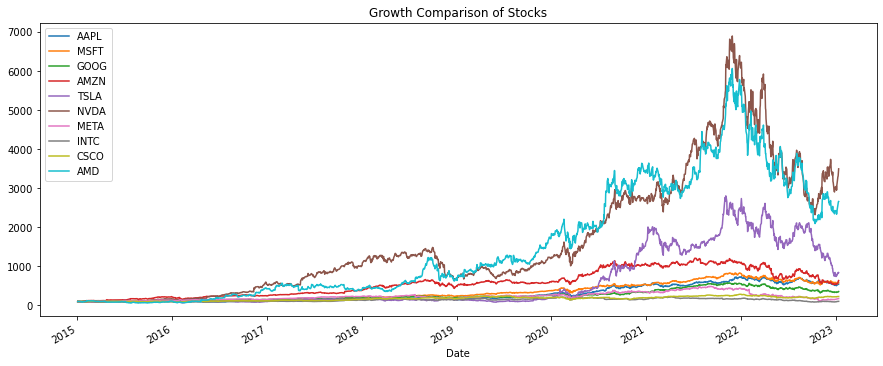

In [31]:
securities.normalization()

<font face = "Times New Roman" size = 5>Parsing dates</font>

Applying Normalization

We use Normalization to visualize the data because we want to facilitate a comparison between the stock prices as if they were starting from a common point

if we don't use normalization we'll encounter variations at the beginning of the plot which won't help in analysis

In [32]:
import pandas 

xlsx = pd.ExcelFile